In [1]:
## Machine Learning Online Class - Exercise 4 Neural Network Learning

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoidGradient.m
#     randInitializeWeights.m
#     nnCostFunction.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import numpy as np
import scipy.io as scio
import sys
sys.path.append(r"..")
import lib.plotting as libplt
import importlib
importlib.reload(libplt)


## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

# 1. 加载和可视化数据

Loading and Visualizing Data ...



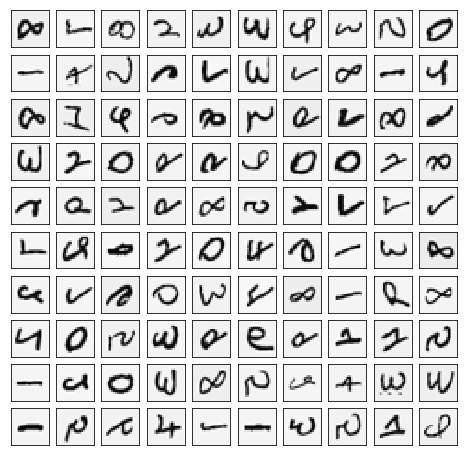

In [2]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

data = scio.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
m = len(X);

# Randomly select 100 data points to display
sel = np.random.permutation(range(m))
sel = sel[:100]

libplt.displayData(X[sel, :])

# 2. 加载参数

In [3]:
## ================ Part 2: Loading Parameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
param = scio.loadmat('ex4weights.mat');
Theta1 = param['Theta1']
Theta2 = param['Theta2']

# Unroll parameters 
#nn_params = [Theta1(:) ; Theta2(:)];
nn_params = np.append(Theta1.ravel(),Theta2.ravel(),axis=None)


Loading Saved Neural Network Parameters ...



In [98]:
a_1 = np.concatenate((np.ones(1),X[0]))

In [99]:
Theta1.dot(a_1)

array([-2.93684669, -2.45058587,  4.95510333,  0.07492977,  0.87241676,
        5.65014719, -4.52318577, -6.41596864,  5.65121414, -3.87156641,
       -2.55955558, -3.81033274, -3.02761383, -2.9383968 , -5.46421117,
        2.06051863,  4.82088856, -2.23170382,  1.71790599,  1.37208071,
       -3.71293077,  4.10936639,  3.56635593,  2.81388641, -2.1195223 ])

In [92]:
np.zeros(1).shape

(1,)

In [116]:
Theta1.shape

(25, 401)

# 3.计算Cost(前向传播)

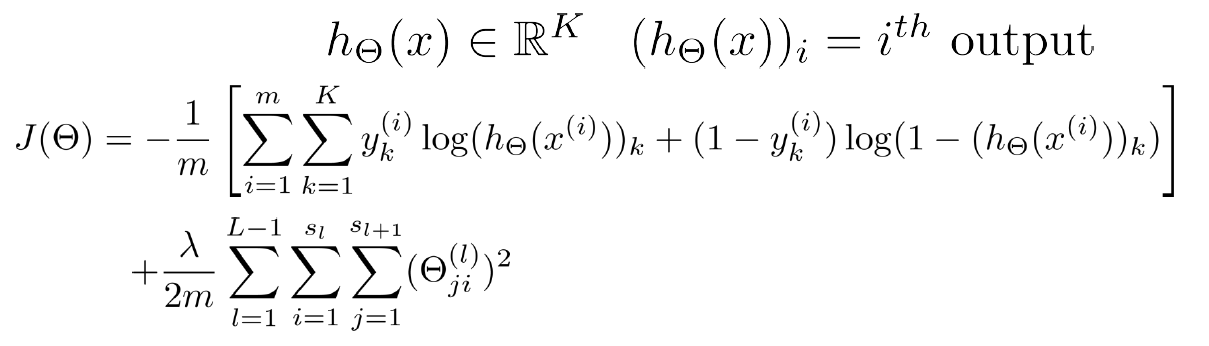

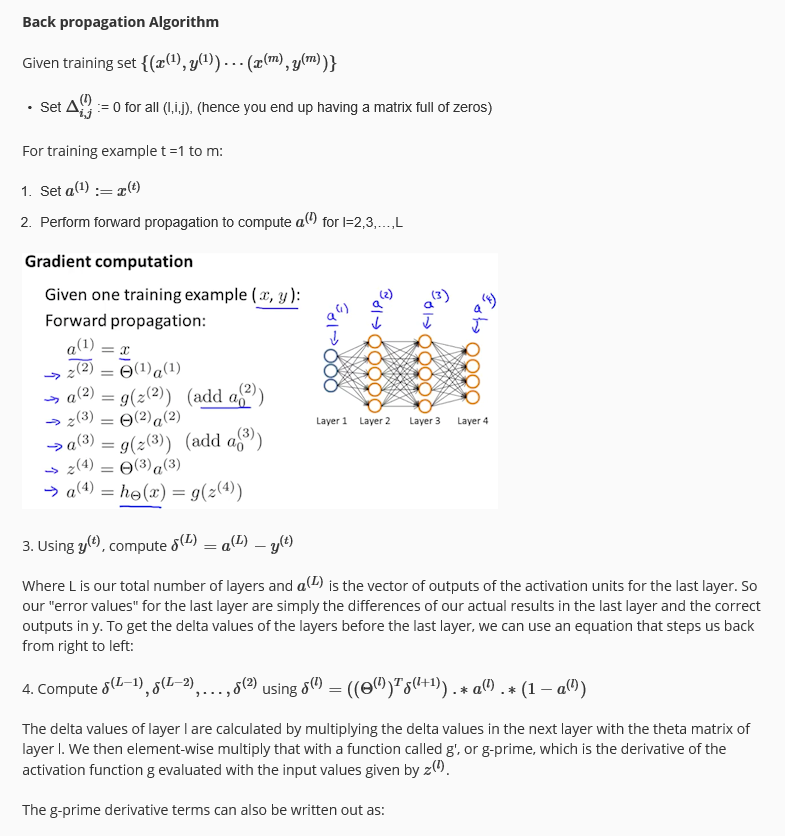
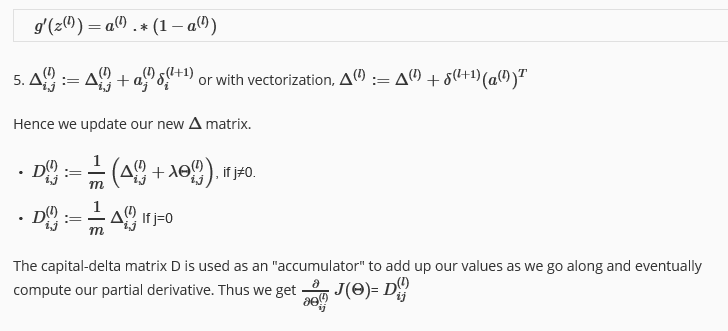

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
def fill_vector(arr):
    number = arr[-1] # get the number in the last element
    arr[int(number)-1] = 1
    return arr

In [119]:
X[0].shape

(400,)

In [129]:
def nnCostFunction(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #NNCOSTFUNCTION Implements the neural network cost function for a two layer
    #neural network which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
    # 
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    #

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = len(X)

    # You need to return the following variables correctly 
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the
    #               following parts.
    #
    # Part 1: Feedforward the neural network and return the cost in the
    #         variable J. After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    #
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    #
    #need to add the column of 1's to the X matrix.
    X = np.column_stack((np.ones((m,1)),X))
    
    A_2 = sigmoid(X.dot(Theta1.T)) #5000*401,401*25->5000*25
    A_2 = np.column_stack((np.ones((len(A_2),1)), A_2))
    h = sigmoid(A_2.dot(Theta2.T)) #5000*26,26*10->5000*10
    
    #convert y(i) into 10 element vector
    y_matrix=np.zeros((m,len(Theta2)))
    #avoid using for loop
    y_matrix = np.column_stack((y_matrix,y)) # add the class label to the last column
    y_matrix = np.apply_along_axis(fill_vector,axis=1,arr=y_matrix)
    y_matrix = y_matrix[:,:-1] #remove the last column->5000*10
    
    J_vec = np.zeros((m,1))
    for i in range(m):
        J_vec[i] = -(y_matrix[i].T.dot(np.log(h[i])+(1-y_matrix[i]).T.dot(np.log(1-h[i]))))
        #print (J_vec[i])
    
    #the assumption here is there're 3 layers
    L = 3
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    
    regular_vec = np.zeros((L-1,1))
    #regular_item = 0
    
    for l in range(L-1):
        regular_vec[l] = np.sum(Thetas_reg[l]*Thetas_reg[l]) #element wise multiply
        #regular_item += np.sum(Thetas[l]*Thetas[l]) #element wise multiply
        
        
    J = np.average(J_vec)+0.5*plambda*np.sum(regular_vec)/m
    #J = np.average(J_vec)+0.5*plambda*regular_item/m



    # -------------------------------------------------------------

    # =========================================================================

    # Unroll gradients
    #grad = [Theta1_grad(:) ; Theta2_grad(:)];
    grad = [Theta1_grad[:],Theta2_grad[:]]
    
    #以下数组索引编号和公式中不同
    a_list = [None]*L # a1,a2,a3
    Thetas = [Theta1,Theta2]
    
    DELTA = np.zeros(L) #DELTA_1, DELTA_2, DELTA_3  len(a[l+1])*len(a[l])
    
    for i in range(m):
        a_list[0] = X[i] #X already added the bias unit
        for l in range(1,L):
            a_list[l] = sigmoid(Thetas[l-1].dot(a_list[l-1]))
            if l != L-1:
                a_list[l] = np.concatenate((np.ones(1),a_list[l]))

  
        delta = [None]* (L-1) #delta_L，delta_L-1...delta_2
        delta[L-2] = a_list[L-1] - y[m]  # delta_L
        for l in range(L-3,0,-1): # for 3-layer nn, only one loop
            delta[l] = Thetas[L-2].T.dot(delta[l+1])*(a_list[l+1])*(1-a_list[l+1])  #delta_L-1....delta_2


        for l in range(L-1):
            DELTA[l] += delta[l+1].dot(a_list[l]).T
            grad[l] = DELTA[l]/m + plambda * Thetas_reg[l]
    
 
    
    return J, grad


In [130]:
## ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.m to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.
#
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
plambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f ' \
         '\n(this value should be about 0.287629)\n'%J);


Feedforward Using Neural Network ...

[array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.61444196e-18,   

In [85]:
## =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#

print('\nChecking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (we set this to 1 here).
plambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f '
         '\n(this value should be about 0.383770)\n'%J);


Checking Cost Function (w/ Regularization) ... 

[ 392.58414243]
392.584142428
[ 568.82279687]
961.406939296
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



In [6]:
## ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.m file.
#

print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print('%f '%g);

array([[ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
         -1.30529929e-05,  -5.04175101e-06,   2.80464449e-09],
       [ -9.83811294e-02,   7.66168682e-09,  -9.75873689e-09, ...,
         -5.60134007e-05,   2.00940969e-07,   3.54422854e-09],
       [  1.16156052e-01,  -8.77654466e-09,   8.16037764e-09, ...,
         -1.20951657e-04,  -2.33669661e-06,  -7.50668099e-09],
       ..., 
       [ -1.83220638e-01,  -8.89272060e-09,  -9.81968100e-09, ...,
          2.35311186e-05,  -3.25484493e-06,   9.02499060e-09],
       [ -7.02096331e-01,   3.05178374e-10,   2.56061008e-09, ...,
         -8.61759744e-04,   9.43449909e-05,   3.83761998e-09],
       [ -3.50933229e-01,   8.85876862e-09,  -6.57515140e-10, ...,
         -1.80365926e-06,  -8.14464807e-06,   8.79454531e-09]])